# General Hashtag Word Cloud (hashtag_cloud.py and hashtag_cloud_nocovid.py)

Packages

In [1]:
import pandas as pd
import numpy as np
import json
import sys
import string
import re
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
import emoji
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
import nltk

Read the json file

In [2]:
data = []
with open('general_result.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

Filter all the hashtags and calculate the frequency distribution

In [4]:
index_covid=0
cmt_list_covid = []
for element in data:
    for entity in data[index_covid]['entities']['hashtags']:
        entity['text'] = entity['text'].lower()
        token_covid=entity['text']
        cmt_list_covid.append(token_covid)
        
    index_covid=index_covid+1
    
fdist_covid = dict(nltk.FreqDist(cmt_list_covid))

Filter all the hashtags WITHOUT the covid words and calculate the frequency distribution

In [5]:
index=0
cmt_list = []
stopwords = ["covid19", "coronavirus", "corona", "covid_19", "covid","coronavirusoutbreak","covid2019", "virus", "covid__19", "covidー19", "coronaviruspandemic"]
for element in data:
    for entity in data[index]['entities']['hashtags']:
        entity['text'] = entity['text'].lower()
        if entity['text'] not in stopwords:
            token=entity['text']
            cmt_list.append(token)
        
    index=index+1

fdist = dict(nltk.FreqDist(cmt_list))

Hashtag word cloud (with covid words)

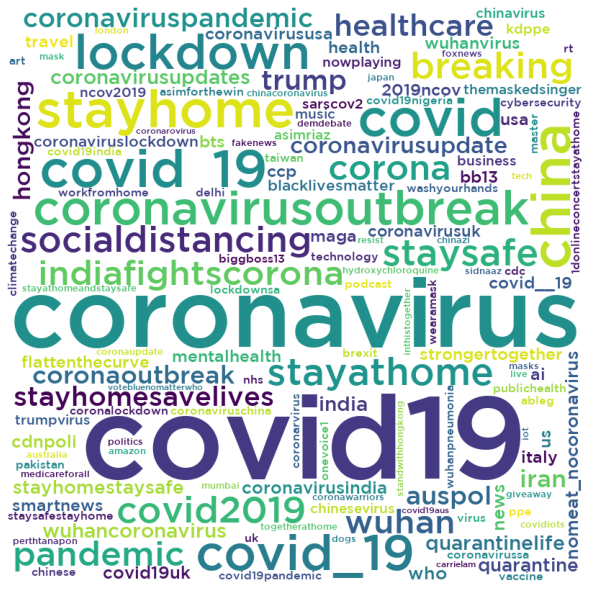

In [6]:
wordcloud_covid = WordCloud(width = 800, height = 800, 
               background_color ='white', 
                min_word_length = 3,
                font_path = 'GothamMedium.ttf',
               min_font_size = 10).generate_from_frequencies(fdist_covid) 

#plot the WordCloud image                        

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_covid) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

Hashtag word cloud (without covid words)

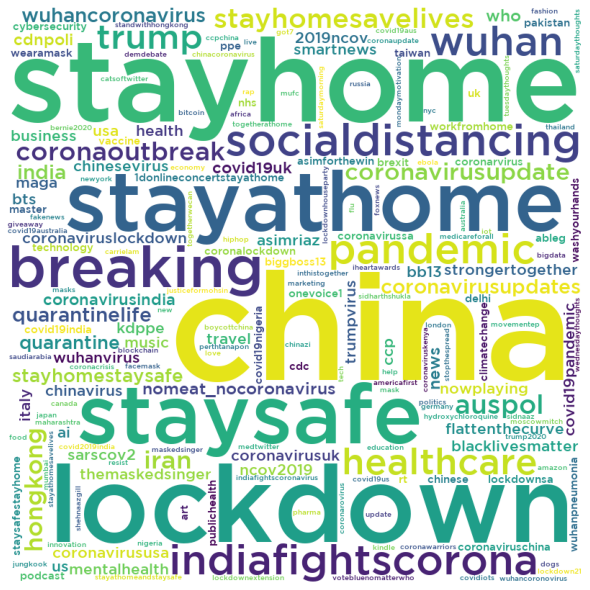

In [7]:
wordcloud = WordCloud(width = 800, height = 800, 
               background_color ='white', 
                min_word_length = 3,
                font_path = 'GothamMedium.ttf',
               min_font_size = 10).generate_from_frequencies(fdist) 

#plot the WordCloud image                        

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 